Following the textbook, maximize the precision of these datasets.

In [22]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [23]:
FILENAME = 'NBADATA.csv'

In [24]:
#retain relevant columns. 
data = pd.read_csv(FILENAME) 
data['3P%'] = np.divide(data['3P'].values,data['3PA'].values) 
del data['3P'],data['3PA']
data['FG%'] = np.divide(data['FG'].values,data['FGA'].values)
del data['FG'],data['FGA']
data['FT%'] = np.divide(data['FT'].values,data['FTA'].values)
del data['Unnamed: 0'],data['PLUS_MINUS'],data['TOTAL']
del data['FT'],data['FTA']
del data['OU']
#del data['Team']
#data = pd.get_dummies(data)

data = data.loc[data['GAME_ID'].values < 41300001] #genius! No playoff games now :) 

In [25]:
teams = data.Team.unique()

In [26]:
len(data)

12300

In [27]:
#iterate over those teams, make a rolling window over n games. 
N_GAMES = 5
nba_data = pd.DataFrame([])
season_ids = []
for i,val in enumerate(data['GAME_ID'].values):
    season_ids.append(str(val)[1:3])

data['Season_ID'] = season_ids


In [28]:
data.head()

,GAME_ID,Date,Team,Home,Away,OR,DR,TOT,PF,ST,TO,BL,PTS,SPREAD,3P%,FG%,FT%,Season_ID
0,21300001,10/29/13,Orlando Magic,0,1,13,26,17,26,10,17,6,87,12.0,0.473684,0.387097,0.600000,13
1,21300001,10/29/13,Indiana Pacers,1,0,10,34,17,13,4,20,18,97,-12.0,0.411765,0.478873,0.687500,13
2,21300002,10/29/13,Chicago Bulls,0,1,11,30,23,27,11,18,4,95,5.0,0.269231,0.421687,0.782609,13
3,21300002,10/29/13,Miami Heat,1,0,5,35,26,21,10,18,7,107,-5.0,0.550000,0.513889,0.758621,13
4,21300003,10/29/13,Los Angeles Clippers,0,1,10,30,27,21,11,16,4,103,-9.5,0.380952,0.493976,0.565217,13


In [29]:
for team in teams:
    print(team)
    #get separate seasons here
    team_data = data.loc[data['Team'] == team]  #this contains the box score of every team game from 2013 to 2018.
    for season in data['Season_ID'].unique():
        print(season)
        team_season = team_data.loc[team_data['Season_ID'] == season]
        
        stuff_to_turn_into_avgs = ['OR', 'DR', 'TOT', 'PF', 'ST', 'TO', 'BL', '3P%', 'FG%', 'FT%','PTS']
        for col in team_season.columns:
            if col in stuff_to_turn_into_avgs:
            #split each season up here, 
                team_season['Rolling ' + col] = team_season[col].rolling(window=N_GAMES).mean().shift(1)
                if col != 'PTS':
                    del team_season[col]
        nba_data =  nba_data.append(team_season)

    #if seasons are the same, do this here, use the GAME_ID signifier. 


Orlando Magic
13


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


14
15
16
17
Indiana Pacers
13
14
15
16
17
Chicago Bulls
13
14
15
16
17
Miami Heat
13
14
15
16
17
Los Angeles Clippers
13
14
15
16
17
Los Angeles Lakers
13
14
15
16
17
Brooklyn Nets
13
14
15
16
17
Cleveland Cavaliers
13
14
15
16
17
Philadelphia 76ers
13
14
15
16
17
Boston Celtics
13
14
15
16
17
Toronto Raptors
13
14
15
16
17
Washington Wizards
13
14
15
16
17
Detroit Pistons
13
14
15
16
17
Milwaukee Bucks
13
14
15
16
17
New York Knicks
13
14
15
16
17
Charlotte Hornets
13
14
15
16
17
Houston Rockets
13
14
15
16
17
Minnesota Timberwolves
13
14
15
16
17
New Orleans Pelicans
13
14
15
16
17
Atlanta Hawks
13
14
15
16
17
Dallas Mavericks
13
14
15
16
17
Memphis Grizzlies
13
14
15
16
17
San Antonio Spurs
13
14
15
16
17
Oklahoma City Thunder
13
14
15
16
17
Utah Jazz
13
14
15
16
17
Portland Trail Blazers
13
14
15
16
17
Phoenix Suns
13
14
15
16
17
Denver Nuggets
13
14
15
16
17
Sacramento Kings
13
14
15
16
17
Golden State Warriors
13
14
15
16
17


In [30]:
nba_data_splits = nba_data.sort_values(by = ['GAME_ID', 'Home','Away'], ascending=[True, True,False])

nba_data_splits.dropna(inplace=True)  #null values come with rolling means, drop those now. 
del nba_data_splits['GAME_ID'],nba_data_splits['Date'],nba_data_splits['Home'],nba_data_splits['Away'],nba_data_splits['Team']
del nba_data_splits['Season_ID']

In [31]:
#now align the box scores so its one big one for each game, home team and road teams. 

road_df = nba_data_splits.iloc[::2]
home_df = nba_data_splits.iloc[1::2]
for col in nba_data_splits.columns:
    road_df['road_' + col] = road_df[col]
    home_df['home_' + col] = home_df[col]
    
    del road_df[col],home_df[col]

home_df.reset_index(inplace=True)
road_df.reset_index(inplace=True)

#merged into a dataframe here. 
df = pd.concat([road_df,home_df],axis=1)
del df['index']

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
#create the dataset here. Can consider the spread, or winner. 
#at the moment only using a single classifier, that seems sufficient. A home team loss is synonymous with a road team win. 
spread = False
winner = True

df['final_SPREAD'] = df['road_PTS'] - df['home_PTS']
del df['road_PTS'], df['home_PTS'],df['home_SPREAD']
           # if openspread + endspread <0:
            #    y.append(np.array([0,1,0]))  #home team covered
            #elif openspread + endspread >0:
            #    y.append(np.array([1,0,0]))  #road covered
           # else: 
           #     y.append(np.array([0,0,1]))  #push!
y = []

if spread: 
    for i in range(len(df)):
        if df['road_SPREAD'].values[i] + df['final_SPREAD'].values[i] < 0:
            y.append(1) #home team covers
        else: # df['road_SPREAD'].values[i] + df['final_SPREAD'].values[i] > 0:
            y.append(0) #road team covers or push
    #else:
    #    y.append(np.array([0,1]))  #push! 
    
if winner:
    for i in range(len(df)):
        if df['final_SPREAD'].values[i] < 0: #home team won. 
            y.append(1)
        else:
            y.append(0) #road team won. 

del df['final_SPREAD']

y_names = np.array(['road team win', 'home team win']) #for preprocessing/visualization. 

In [33]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)


In [34]:
X_tsne = tsne.fit_transform(df.values)

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

import mglearn

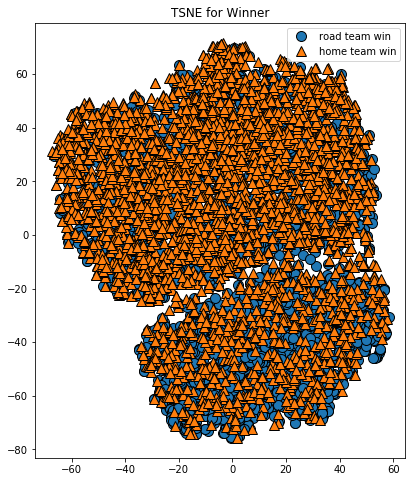

In [36]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_tsne[:,0],X_tsne[:,1],y)
plt.legend(y_names,loc='best')
plt.gca().set_aspect('equal')
plt.title('TSNE for Winner') 

# Pipeline Implementation Thursday @ 7:15

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df.values

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

pipe = Pipeline([("scaler",MinMaxScaler()),("svm",SVC())])
param_grid = {'svm__C': [.001,.005,.05,.1,.5,1],'svm__gamma': [.001,.005,.05,.1,.5,1]}
grid = GridSearchCV(pipe,param_grid=param_grid,cv=5)


grid.fit(X_train,y_train)

print("Best cross val acc: ",grid.best_score_)
print("test score: ", grid.score(X_test,y_test))
print("Best parameters: ", grid.best_params_)



In [ ]:
pipe.score(X_test,y_test)

Grid Search Practice Here

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.values

scaler = MinMaxScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
param_grid = {'C': [.1,.11,.124],'gamma': [.0085,.009]}

grid_search = GridSearchCV(SVC(),param_grid,cv=5)

grid_search.fit(X_train,y_train)

test_score = grid_search.score(X_test,y_test)
print("Test set score: ", test_score)

cutoff  = 0.52381

if test_score>cutoff:
    print("This is profitable!")
    winnings = 1*test_score - 1.1*(1-test_score)
    print("in 10 games w/ 10$ bets, you'd make ", 100*winnings, 'with no outside interference.')

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2


pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [10, 15, 23]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid)
grid.fit(X.values, y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('spread guess accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

In [ ]:
#scale and split the data here. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#this is done in a relatively un-pythonic way. Can also all be in one line! 
scaler = MinMaxScaler()

scaler.fit(df.values)
y=np.array(y)
X = scaler.transform(df.values)
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 69)

# Trying some simple stuff right here. Want to use polynomial ordering, besides that go back to the copy 1 version. 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))

print(logreg.score(X_test,y_test))  #bad!

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_score

poly_transformer = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
X_train_poly = poly_transformer.fit_transform(X_train)

X_test_poly = poly_transformer.fit_transform(X_test)


from sklearn.decomposition import PCA
principal_features = 3
pca = PCA(n_components = principal_features)

pca.fit(X_train)
X_train_pca = pca.transform(X_train)  #turns it into a two feature dataset. 
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print("Normal")
logreg.fit(X_train,y_train)
print(logreg.score(X_train,y_train))

print(logreg.score(X_test,y_test))
print("")
print("Poly")
logreg.fit(X_train_poly,y_train)
print(logreg.score(X_train_poly,y_train))

print(logreg.score(X_test_poly,y_test))


print("")
print("PCA")
logreg.fit(X_train_pca,y_train)
print(logreg.score(X_train_pca,y_train))

print(logreg.score(X_test_pca,y_test))

In [ ]:
print("normal")
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
print('precision= ',precision_score(y_test,y_pred))

In [ ]:
np.shape(X[:][0:int(len(X[0])/2)])

In [ ]:
np.shape(X[:][len(X[0]):-1])

In [ ]:
np.shape(X)

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier()

print("normal")
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
print('precision= ',precision_score(y_test,y_pred))

print()
print("poly")
model.fit(X_train_poly,y_train)
print(model.score(X_train_poly,y_train))
print(model.score(X_test_poly,y_test))
y_pred = model.predict(X_test_poly)
print('precision= ',precision_score(y_test,y_pred))

print()
print("pca")

model.fit(X_train_pca,y_train)
print(model.score(X_train_pca,y_train))
print(model.score(X_test_pca,y_test))
y_pred = model.predict(X_test_pca)
print('precision= ',precision_score(y_test,y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

print("normal")
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
print('precision= ',precision_score(y_test,y_pred))

print()
print("poly")
model.fit(X_train_poly,y_train)
print(model.score(X_train_poly,y_train))
print(model.score(X_test_poly,y_test))
y_pred = model.predict(X_test_poly)
print('precision= ',precision_score(y_test,y_pred))

print()
print("pca")

model.fit(X_train_pca,y_train)
print(model.score(X_train_pca,y_train))
print(model.score(X_test_pca,y_test))
y_pred = model.predict(X_test_pca)
print('precision= ',precision_score(y_test,y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

print("normal")
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
print('precision= ',precision_score(y_test,y_pred))

print()
print("poly")
model.fit(X_train_poly,y_train)
print(model.score(X_train_poly,y_train))
print(model.score(X_test_poly,y_test))
y_pred = model.predict(X_test_poly)
print('precision= ',precision_score(y_test,y_pred))

print()
print("pca")

model.fit(X_train_pca,y_train)
print(model.score(X_train_pca,y_train))
print(model.score(X_test_pca,y_test))
y_pred = model.predict(X_test_pca)
print('precision= ',precision_score(y_test,y_pred))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

print("normal")
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
print('precision= ',precision_score(y_test,y_pred))

print()
print("poly")
model.fit(X_train_poly,y_train)
print(model.score(X_train_poly,y_train))
print(model.score(X_test_poly,y_test))
y_pred = model.predict(X_test_poly)
print('precision= ',precision_score(y_test,y_pred))

print()
print("pca")

model.fit(X_train_pca,y_train)
print(model.score(X_train_pca,y_train))
print(model.score(X_test_pca,y_test))
y_pred = model.predict(X_test_pca)
print('precision= ',precision_score(y_test,y_pred))


In [ ]:
from sklearn.svm import SVC

model = SVC()


print("normal")
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
print('precision= ',precision_score(y_test,y_pred))

print()
print("poly")
model.fit(X_train_poly,y_train)
print(model.score(X_train_poly,y_train))
print(model.score(X_test_poly,y_test))
y_pred = model.predict(X_test_poly)
print('precision= ',precision_score(y_test,y_pred))

print()
print("pca")

model.fit(X_train_pca,y_train)
print(model.score(X_train_pca,y_train))
print(model.score(X_test_pca,y_test))
y_pred = model.predict(X_test_pca)
print('precision= ',precision_score(y_test,y_pred))


In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()


print("normal")
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
print('precision= ',precision_score(y_test,y_pred))

print()
print("poly")
model.fit(X_train_poly,y_train)
print(model.score(X_train_poly,y_train))
print(model.score(X_test_poly,y_test))
y_pred = model.predict(X_test_poly)
print('precision= ',precision_score(y_test,y_pred))

print()
print("pca")

model.fit(X_train_pca,y_train)
print(model.score(X_train_pca,y_train))
print(model.score(X_test_pca,y_test))
y_pred = model.predict(X_test_pca)
print('precision= ',precision_score(y_test,y_pred))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

print("normal")
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
print('precision= ',precision_score(y_test,y_pred))

print()
print("poly")
model.fit(X_train_poly,y_train)
print(model.score(X_train_poly,y_train))
print(model.score(X_test_poly,y_test))
y_pred = model.predict(X_test_poly)
print('precision= ',precision_score(y_test,y_pred))

print()
print("pca")

model.fit(X_train_pca,y_train)
print(model.score(X_train_pca,y_train))
print(model.score(X_test_pca,y_test))
y_pred = model.predict(X_test_pca)
print('precision= ',precision_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import precision_score

print('precision= ',precision_score(y_test,y_pred))

In [ ]:
model = MLPClassifier()

model.fit(X_trainval,y_trainval)
model.n_layers_ = 4
print(model.n_layers_)
model.


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,random_state = 0)

X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,random_state = 1)
#print size of datasets here

best_score = 0

for gamma in [.001,.01,.1,1,10,100]:
    for C in [.001,.01,.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_val,y_val)
        if score > best_score:
            print("obtained score:", score)

            best_score = score
            best_parameters = {'C' : C,'gamma' : gamma}

svm = SVC(gamma=best_parameters['gamma'],C=best_parameters['C'])
svm.fit(X_trainval,y_trainval)
test_score = svm.score(X_test,y_test)
print("best params: ",best_parameters['gamma'],best_parameters['C'])
print("test score w/ best params: ", test_score)


Created best SVM, now optimize precision. 

In [ ]:
#Look at ordinary confusion matrix. 
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test)
confusion = confusion_matrix(y_test,y_pred)

print(confusion)

In [ ]:
588 /(588+559)

In [ ]:
#Now try lowering the threshold. 
y_pred_lower_threshold = svm.decision_function(X_test) >thresholds[close_zero]
confusion = confusion_matrix(y_test,y_pred_lower_threshold)
print(confusion)

In [ ]:
thresholds[close_zero]

Now time for the precision recall curve. 

In [ ]:
precision,recall,thresholds = precision_recall_curve(y_test,svm.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o')
plt.plot(precision,recall,label = 'precision recall curve')
plt.xlabel("precision")
plt.ylabel('recall')
plt.legend(loc='best')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
precision.ind[max(precision)]

In [ ]:
data = pd.DataFrame([])

data['Precision'] = precision
data['recall'] = recall
data['threshold'] = thresholds

In [ ]:
np.argmin(thresholds)

In [ ]:
len(precision)

In [ ]:
thresholds[0]

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test,y_pred_higher_threshold)

In [ ]:
confusion

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision,recall, thresholds = precision_recall_curve(y_test)

In [ ]:
y_pred_higher_threshold = svm.decision_function(X_test) >-.8

In [ ]:
sum(y_pred_lower_threshold)/len(y_pred_lower_threshold)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_trainval,X_test,y_trainval,y_test = train_test_split(X,y,random_state = 0)

X_train,X_val,y_train,y_val = train_test_split(X_trainval,y_trainval,random_state = 1)
#print size of datasets here

best_score = 0

for alpha in [.0001,.001,.01]:
    model = MLPClassifier(alpha=alpha)
    model.fit(X_train,y_train)
    score = model.score(X_val,y_val)
    if score > best_score:
        print("obtained score:", score)

        best_score = score
        best_parameters = {'alpha' : alpha}

model = MLPClassifier(alpha=best_parameters['alpha'])
model.fit(X_trainval,y_trainval)
test_score = model.score(X_test,y_test)
print("best params: ",best_parameters['alpha'])
print("test score w/ best params: ", test_score)
